# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from pandas.tseries.offsets import DateOffset
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
btc_price = btc_response_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
eth_price = eth_response_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $59880.00
The current value of your 5.3 ETH is $21459.54


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-05-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(tickers,  timeframe, start = today, end = today).df

# Preview DataFrame
df_portfolio.head()

AGG                                       SPY  \
                             open    high       low   close   volume   open   
time                                                                          
2021-05-14 00:00:00-04:00  114.22  114.28  114.1219  114.28  3711363  413.2   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-14 00:00:00-04:00  417.49  413.18  416.53  69012933

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.28
Current SPY closing price: $416.53


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20826.50
The current value of your 200 AGG shares is $22856.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto_value = my_btc_value + my_eth_value
stock_value = my_spy_value + my_agg_value

d = {
    'amount':[
        crypto_value,
        stock_value
    ]
}

indicies = ['crypto','shares']

df_savings = pd.DataFrame(data = d, index = indicies)

# Display savings DataFrame
display(df_savings)

amount
crypto  81339.541
shares  43682.500

<AxesSubplot:title={'center':'Savings Portfolio Composition'}, ylabel='amount'>

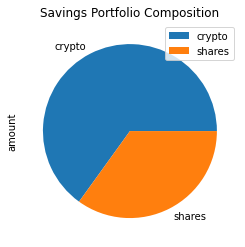

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Savings Portfolio Composition")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum()['amount']
difference = emergency_fund - total_savings
# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations for having enough money in this fund.')
elif total_savings == emergency_fund:
    print('Congratulations for reaching this financial goal.')
else:
    print('You are ${difference} away from reaching this goal.')

Congratulations for having enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-14', tz='America/New_York').isoformat()
start_date_plus_thousand = (pd.Timestamp('2016-05-14', tz='America/New_York') + DateOffset(days=1000)).isoformat()
start_date_plus_thousand_one = (pd.Timestamp('2016-05-14', tz='America/New_York') + DateOffset(days=1001)).isoformat()
end_date = pd.Timestamp('2021-05-14', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data_1 = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=start_date_plus_thousand,
    limit=1000,
).df
df_stock_data_2 = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date_plus_thousand_one,
    end=end_date,
    limit=1000,
).df #ask for 5 years of historical data but one API call only returns max 1000 records, annoying

df_stock_data = pd.concat([df_stock_data_1,df_stock_data_2]).dropna()
# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2016-05-16 00:00:00-04:00  111.19  111.19  110.980  111.000  2983296  204.96   
2016-05-17 00:00:00-04:00  111.03  111.05  110.870  110.870  1603040  206.46   
2016-05-18 00:00:00-04:00  110.78  110.80  110.315  110.405  1765696  204.44   
2016-05-19 00:00:00-04:00  110.47  110.56  110.400  110.480  3163019  204.06   
2016-05-20 00:00:00-04:00  110.54  110.62  110.440  110.540  2528887  204.92   

                                                              
                             high     low   close     volume  
time                                                          
2016-05-16 00:00:00-04:00  207.34  204.89  206.78   60903170  
2016-05-17 00:00:00-04:00  206.80  204.23  204.88   93793897  
2016-05-18 00:00:00-04:00  206.30  203.63  204.96  106529779  
2016-05-19 00:00:00-04:00  204.54  202.78  204.22   92622487  
2016-05-20 00:00:00-04:00  206.10  204.86  205.46   68886000

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
MC_stocks = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_stocks.portfolio_data.head()

AGG                                     \
                             open    high      low    close   volume   
time                                                                   
2016-05-16 00:00:00-04:00  111.19  111.19  110.980  111.000  2983296   
2016-05-17 00:00:00-04:00  111.03  111.05  110.870  110.870  1603040   
2016-05-18 00:00:00-04:00  110.78  110.80  110.315  110.405  1765696   
2016-05-19 00:00:00-04:00  110.47  110.56  110.400  110.480  3163019   
2016-05-20 00:00:00-04:00  110.54  110.62  110.440  110.540  2528887   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-05-16 00:00:00-04:00          NaN  204.96  207.34  204.89  206.78   
2016-05-17 00:00:00-04:00    -0.001171  206.46  206.80  204.23  204.88   
2016-05-18 00:00:00-04:00    -0.004194  204.44  206.30  203.63  204.96   
2016-05-19 00:00:00-04:00     0.000679  204.06  204.54  202.78  204.22   
2016-05-20 00:00:00-04:00     0.000543  204.92  206.10  204.86  205.46   

                                                   
                              volume daily_return  
time                                               
2016-05-16 00:00:00-04:00   60903170          NaN  
2016-05-17 00:00:00-04:00   93793897    -0.009189  
2016-05-18 00:00:00-04:00  106529779     0.000390  
2016-05-19 00:00:00-04:00   92622487    -0.003610  
2016-05-20 00:00:00-04:00   68886000     0.006072

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2         3         4          5    \
0      1.000000   1.000000   1.000000  1.000000  1.000000   1.000000   
1      1.013933   0.986986   1.019541  0.999186  1.004183   0.989478   
2      1.023443   0.982255   1.008797  0.994072  1.005040   0.979881   
3      1.023117   0.984497   0.998881  0.999014  1.001633   0.972462   
4      1.030191   0.985538   0.998704  1.000721  1.011497   0.983875   
...         ...        ...        ...       ...       ...        ...   
7556  61.135187  13.560720  20.439304  7.229369  8.375275  11.698362   
7557  60.900991  13.496374  20.462587  7.141454  8.439981  11.745467   
7558  60.960133  13.555705  20.239362  7.089773  8.461419  11.629613   
7559  61.378739  13.487723  20.303666  7.026510  8.553949  11.748972   
7560  61.997531  13.454014  20.157385  6.978604  8.530292  11.754784   

            6          7          8          9    ...        490        491  \
0      1.000000   1.000000   1.000000   1.000000  ...   1.000000   1.000000   
1      0.998744   1.002348   1.003624   0.999602  ...   1.016573   1.003649   
2      1.001270   1.012040   1.009419   0.997777  ...   1.014826   1.013304   
3      1.008877   1.003028   1.010404   0.999345  ...   1.027693   1.006136   
4      1.000779   1.003545   1.021591   1.016027  ...   1.032321   1.000664   
...         ...        ...        ...        ...  ...        ...        ...   
7556  14.152241  30.533708  10.005664  37.708786  ...  35.412635  38.865580   
7557  13.835687  30.598845  10.060623  37.590046  ...  35.445989  39.007767   
7558  14.067202  30.435908  10.174400  37.603706  ...  35.092706  38.992059   
7559  14.126974  30.475554  10.138434  37.422894  ...  35.505768  38.780313   
7560  14.073694  30.236529  10.104112  37.622074  ...  35.369820  38.988603   

            492        493        494        495       496        497  \
0      1.000000   1.000000   1.000000   1.000000  1.000000   1.000000   
1      0.984613   0.996648   1.007813   0.996930  0.998967   1.010002   
2      0.978069   0.994584   1.010857   0.996322  0.999851   1.006899   
3      0.984698   0.991754   1.009598   0.986660  1.013353   0.999903   
4      0.995808   1.003168   1.007065   0.981955  1.006558   1.006636   
...         ...        ...        ...        ...       ...        ...   
7556  17.505776  13.963117  13.404795  38.782392  9.274850  16.247014   
7557  17.672554  13.983102  13.485285  38.305675  9.196031  16.363866   
7558  17.600833  14.123441  13.520579  37.924977  9.242795  16.162419   
7559  17.668988  14.114736  13.575643  37.493498  9.309330  16.020687   
7560  17.693801  14.090993  13.540795  37.820030  9.238489  16.413712   

            498       499  
0      1.000000  1.000000  
1      1.005742  1.013293  
2      1.005278  1.017296  
3      1.002567  1.023205  
4      0.991989  1.032818  
...         ...       ...  
7556  14.586525  2.654082  
7557  14.571505  2.671382  
7558  14.665716  2.660421  
7559  14.635432  2.632557  
7560  14.910481  2.630829  

[7561 rows x 500 columns]

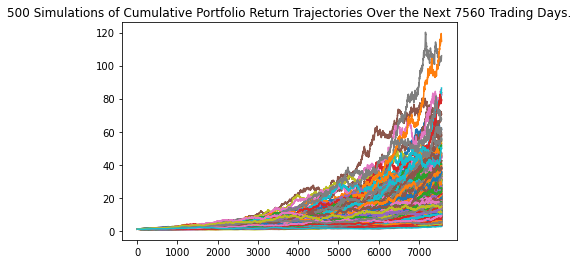

In [19]:
# Plot simulation outcomes
line_plot = MC_stocks.plot_simulation()

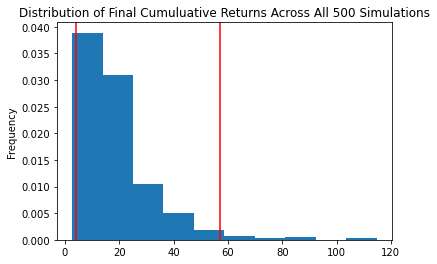

In [20]:
# Plot probability distribution and confidence intervals
line_plot = MC_stocks.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_tbl = MC_stocks.summarize_cumulative_return()

# Print summary statistics
print(sum_tbl)

count           500.000000
mean             19.049205
std              14.356891
min               2.630829
25%               9.675641
50%              15.574381
75%              23.798653
max             114.704985
95% CI Lower      4.018903
95% CI Upper     56.936709
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_tbl[8]*initial_investment,2)
ci_upper = round(sum_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $80378.05 and $1138734.17


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment_other = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_other = round(sum_tbl[8]*initial_investment_other,2)
ci_upper_other = round(sum_tbl[9]*initial_investment_other,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_other} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_other} and ${ci_upper_other}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $120567.08 and $1708101.26


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.3,.7],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.993276  1.016160  1.003951  1.001930  0.989283  0.997869  0.993114   
2     0.994363  1.011401  1.000755  1.003273  0.982582  1.012666  0.998452   
3     0.988633  1.008601  1.000874  1.006285  0.987659  1.020212  0.990261   
4     0.977255  0.988567  0.994371  1.003695  0.990930  1.018377  0.991706   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.334949  2.179372  1.156268  1.685324  2.841251  3.195159  1.354753   
1257  1.350921  2.187505  1.156891  1.690378  2.866672  3.198321  1.343620   
1258  1.362584  2.218307  1.163583  1.666137  2.841890  3.174232  1.348892   
1259  1.361931  2.208216  1.191503  1.667712  2.828965  3.131316  1.342592   
1260  1.354831  2.186902  1.196688  1.640559  2.846429  3.086910  1.369616   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.005143  0.993787  1.003123  ...  1.008477  0.999356  0.989948   
2     0.995751  0.988067  1.001045  ...  1.017859  1.011012  0.999939   
3     0.994234  0.976045  1.009172  ...  1.027657  1.019009  1.002495   
4     1.005117  0.984074  1.017239  ...  1.033752  1.003810  0.989510   
...        ...       ...       ...  ...       ...       ...       ...   
1256  2.940567  1.832702  1.906309  ...  1.066281  1.872144  1.822556   
1257  2.916403  1.854097  1.911447  ...  1.076290  1.870785  1.824839   
1258  2.922819  1.855038  1.910104  ...  1.078968  1.867738  1.830423   
1259  2.883216  1.852059  1.945100  ...  1.074311  1.864085  1.800253   
1260  2.925745  1.856230  1.952699  ...  1.092168  1.850938  1.810538   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.995326  1.003270  1.003961  0.992588  1.003574  1.004294  0.997050  
2     0.984866  1.006737  0.996590  0.991702  1.010632  1.014518  1.005246  
3     0.986907  0.992383  0.997821  0.989668  1.007114  1.014975  1.016045  
4     0.997352  0.980952  0.993340  0.978903  1.001078  1.023662  1.017595  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.758008  1.866544  1.335129  1.962317  2.013490  2.373012  2.187809  
1257  1.728182  1.859602  1.318281  1.950182  2.000584  2.384666  2.214743  
1258  1.731794  1.868128  1.319856  1.915668  1.985306  2.364666  2.206646  
1259  1.715843  1.877672  1.320394  1.937502  1.979953  2.386431  2.218463  
1260  1.740367  1.897458  1.327627  1.949145  1.960554  2.382555  2.207734  

[1261 rows x 500 columns]

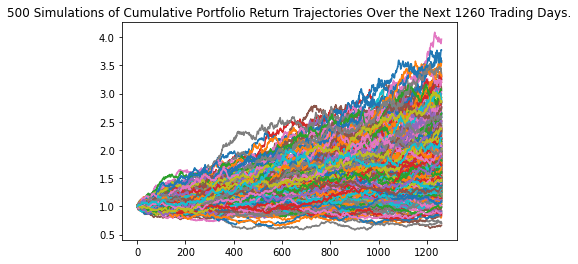

In [26]:
# Plot simulation outcomes
line_plot_five = MC_stocks_five.plot_simulation()

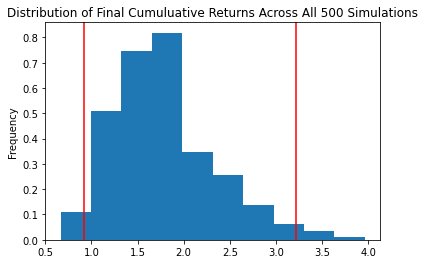

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_stocks_five.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_tbl_five = MC_stocks_five.summarize_cumulative_return()

# Print summary statistics
print(sum_tbl_five)

count           500.000000
mean              1.783139
std               0.555959
min               0.664910
25%               1.377616
50%               1.702453
75%               2.060225
max               3.964114
95% CI Lower      0.920035
95% CI Upper      3.214763
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment_five = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_five = round(sum_tbl_five[8]*initial_investment_five,2)
ci_upper_five = round(sum_tbl_five[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $46001.75 and $160738.15


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.25,.75],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.996611  0.995152  1.006720  1.008448  1.009970  0.999980  1.019898   
2     0.981138  0.998822  1.011835  1.019057  1.012106  0.999727  1.019762   
3     0.987002  0.999693  1.018871  1.006505  1.034720  0.997231  1.037606   
4     1.003140  0.990101  1.017168  1.010774  1.041367  0.997866  1.029113   
...        ...       ...       ...       ...       ...       ...       ...   
2516  2.310469  2.367192  2.200176  3.159817  4.606202  1.488583  6.043462   
2517  2.277828  2.354226  2.219882  3.161077  4.625870  1.487133  6.047831   
2518  2.275233  2.384542  2.220389  3.171073  4.620188  1.501863  5.984701   
2519  2.249960  2.399690  2.192766  3.170127  4.601992  1.500800  6.105777   
2520  2.245039  2.388920  2.215423  3.119403  4.620310  1.511945  6.094053   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.003057  0.990930  1.011952  ...  0.996137  1.001169  0.997839   
2     1.007179  0.976857  1.003196  ...  0.992822  1.005069  0.991325   
3     0.993436  0.953746  1.008594  ...  0.995292  0.997954  0.987200   
4     0.991871  0.956587  0.999241  ...  0.986779  1.011316  0.971248   
...        ...       ...       ...  ...       ...       ...       ...   
2516  2.259100  6.874991  3.166111  ...  1.786851  2.358403  2.796314   
2517  2.280393  6.910468  3.151421  ...  1.793117  2.376164  2.786303   
2518  2.290923  6.892589  3.176609  ...  1.788362  2.374279  2.807385   
2519  2.299889  6.796462  3.169256  ...  1.799966  2.335889  2.789720   
2520  2.309177  6.700249  3.185068  ...  1.794047  2.346318  2.822098   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.975422  0.995254  0.995587  0.986938  1.002272  1.006074  1.013161  
2     0.974536  0.990528  1.002581  0.987620  0.999179  1.013126  1.010156  
3     0.985801  0.998539  0.999973  0.986556  0.991692  1.021499  1.024531  
4     0.981812  1.002977  1.004282  0.983211  1.005846  1.023231  1.026757  
...        ...       ...       ...       ...       ...       ...       ...  
2516  2.556123  3.205046  3.738493  3.107159  1.898828  6.530559  4.214541  
2517  2.530626  3.268140  3.763166  3.116747  1.918120  6.581997  4.193476  
2518  2.565604  3.292718  3.749902  3.175899  1.889731  6.611737  4.217401  
2519  2.566735  3.342444  3.751262  3.119234  1.924765  6.722171  4.238091  
2520  2.538788  3.372288  3.760728  3.079192  1.897649  6.823293  4.231137  

[2521 rows x 500 columns]

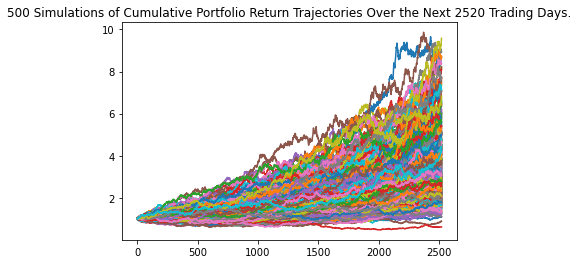

In [32]:
# Plot simulation outcomes
line_plot_ten = MC_stocks_ten.plot_simulation()

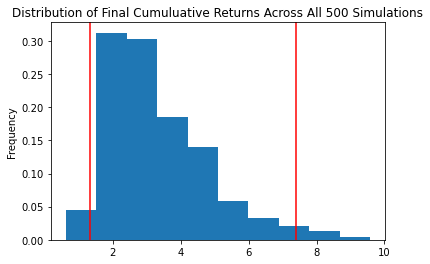

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_stocks_ten.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_tbl_ten = MC_stocks_ten.summarize_cumulative_return()

# Print summary statistics
print(sum_tbl_ten)

count           500.000000
mean              3.320920
std               1.516424
min               0.615117
25%               2.246684
50%               2.927444
75%               4.156645
max               9.579505
95% CI Lower      1.319430
95% CI Upper      7.405219
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment_ten = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_ten = round(sum_tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(sum_tbl_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $131943.02 and $740521.89
